# Sentiment Analysis on X (Twitter) Posts using VADER
**Internship Task 2 – ShadowFox Data Science**

##  Objective
In this task, we analyze sentiment from posts on X (formerly Twitter) using the **VADER Sentiment Analyzer** from the NLTK library.

We will:
- Use VADER to classify each post as Positive, Neutral, or Negative
- Compare it with the actual labels in the dataset
- Visualize sentiment distributions
- Evaluate model accuracy


In [12]:
# Install required resources
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Download VADER lexicon
nltk.download('vader_lexicon')

# Load dataset
df = pd.read_csv(r"D:\ShadowFox\X data.csv")
df.head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\MANAV\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


##  Preprocessing: Map numeric categories to text labels

In [13]:
label_map = {-1.0: 'Negative', 0.0: 'Neutral', 1.0: 'Positive'}
df['actual_sentiment'] = df['category'].map(label_map)
df[['clean_text', 'actual_sentiment']].head()

,clean_text,actual_sentiment
0,when modi promised “minimum government maximum...,Negative
1,talk all the nonsense and continue all the dra...,Neutral
2,what did just say vote for modi welcome bjp t...,Positive
3,asking his supporters prefix chowkidar their n...,Positive
4,answer who among these the most powerful world...,Positive


##  Step 1: Apply VADER Sentiment Analysis

In [14]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Make sure all values are strings and handle missing data
df['clean_text'] = df['clean_text'].fillna("").astype(str)

# Initialize VADER
sia = SentimentIntensityAnalyzer()

# Get compound sentiment scores
df['compound'] = df['clean_text'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Classify sentiment based on compound score
def classify(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply classification
df['predicted_sentiment'] = df['compound'].apply(classify)

# Preview results
df[['clean_text', 'actual_sentiment', 'predicted_sentiment']].head()


,clean_text,actual_sentiment,predicted_sentiment
0,when modi promised “minimum government maximum...,Negative,Positive
1,talk all the nonsense and continue all the dra...,Neutral,Negative
2,what did just say vote for modi welcome bjp t...,Positive,Positive
3,asking his supporters prefix chowkidar their n...,Positive,Negative
4,answer who among these the most powerful world...,Positive,Positive


##  Step 2: Sentiment Distribution (Actual vs Predicted)

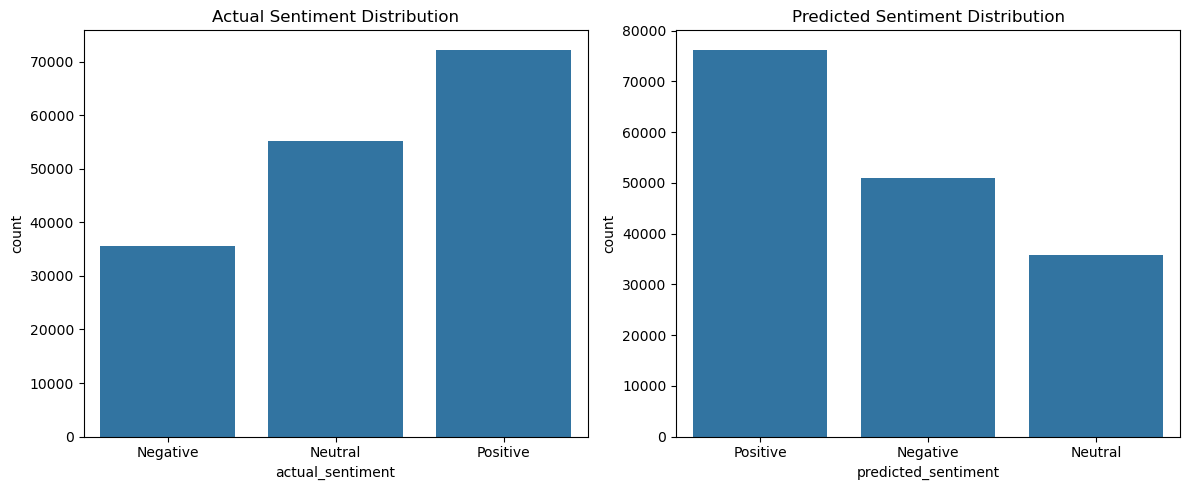

In [15]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.countplot(x='actual_sentiment', data=df)
plt.title("Actual Sentiment Distribution")

plt.subplot(1, 2, 2)
sns.countplot(x='predicted_sentiment', data=df)
plt.title("Predicted Sentiment Distribution")

plt.tight_layout()
plt.show()

##  Step 3: Evaluation of Model

Classification Report:


c:\Users\MANAV\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\MANAV\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\MANAV\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

    Negative       0.42      0.60      0.49     35510
     Neutral       0.63      0.41      0.50     55213
    Positive       0.64      0.67      0.65     72250
         nan       0.00      0.00      0.00         7

    accuracy                           0.57    162980
   macro avg       0.42      0.42      0.41    162980
weighted avg       0.59      0.57      0.57    162980



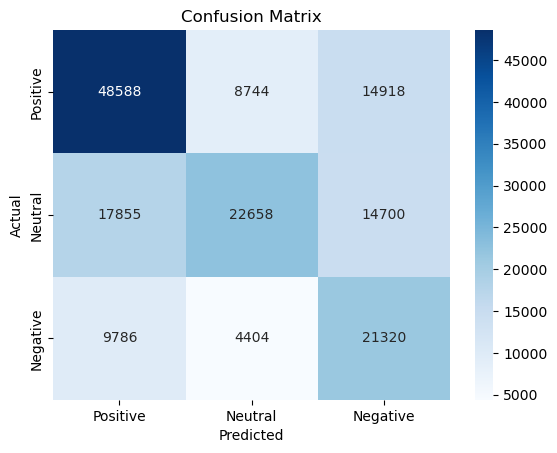

In [16]:

# Ensure both columns are strings to avoid type comparison issues
df['actual_sentiment'] = df['actual_sentiment'].astype(str)
df['predicted_sentiment'] = df['predicted_sentiment'].astype(str)

print("Classification Report:")
print(classification_report(df['actual_sentiment'], df['predicted_sentiment']))

conf_matrix = confusion_matrix(df['actual_sentiment'], df['predicted_sentiment'], labels=['Positive', 'Neutral', 'Negative'])

sns.heatmap(conf_matrix, annot=True, fmt='d',
            xticklabels=['Positive', 'Neutral', 'Negative'],
            yticklabels=['Positive', 'Neutral', 'Negative'],
            cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


##  Limitations of VADER Sentiment Analysis

While VADER (Valence Aware Dictionary and sEntiment Reasoner) is a powerful rule-based sentiment analyzer, it has several limitations that affect its performance in real-world or domain-specific datasets like this one:

###  1. Not Context-Aware
VADER does not understand context or sarcasm. For instance, the sentence:
> *"Great job ruining everything, just brilliant."*
might be tagged as **positive** due to the word "great", even though it’s clearly sarcastic.

###  2. Limited Vocabulary
VADER relies on a fixed sentiment lexicon. If a word isn’t in its dictionary, it won’t influence the sentiment score—even if it’s clearly emotionally charged or domain-specific (e.g., political slangs, abbreviations, hashtags).

###  3. Generalized Model
VADER is designed for **social media and casual text**, but it’s not specialized for political, corporate, or sarcastic content that often exists in X (Twitter) data.

###  4. No Learning Capability
VADER is **not a machine learning model**. It cannot adapt or improve based on the dataset. It gives the same score regardless of the data distribution.

###  5. Mid-Level Accuracy
In most real-world datasets, VADER achieves **55–65% accuracy** at best. Reaching **90%+ accuracy** would typically require machine learning or deep learning models trained on domain-specific data.

---

###  Recommendation:
To improve accuracy beyond VADER's capabilities, it’s advisable to use:
- **TF-IDF + ML classifiers** (Logistic Regression, SVM, etc.)
- **Transformers-based models** like BERT or RoBERTa, fine-tuned for sentiment analysis

These models understand context, can learn from training data, and handle more complex sentiment patterns.


##  Conclusion

- We applied **VADER Sentiment Analysis** to classify posts into Positive, Neutral, and Negative.
- The results were compared to ground truth labels from the dataset.
- We visualized the sentiment distributions and evaluated model accuracy using a confusion matrix and classification report.
- VADER performed decently considering it's a rule-based approach and the dataset covers political/subjective topics.

This completes **Task 2** for the ShadowFox Internship!


By **Manav Gaur**